Tan Minh Pham A01215507

In [1]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
    
# Show top 5-records
diabetes.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

In [2]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)

## K-Nearest Neighbors Classification

In [3]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=4)
 
# Train the model using the training dataset
model.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = model.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7402597402597403
Precision: 0.7272727272727273
Recall: 0.47058823529411764
F1-Score: 0.5714285714285714


## Confusion Matrix

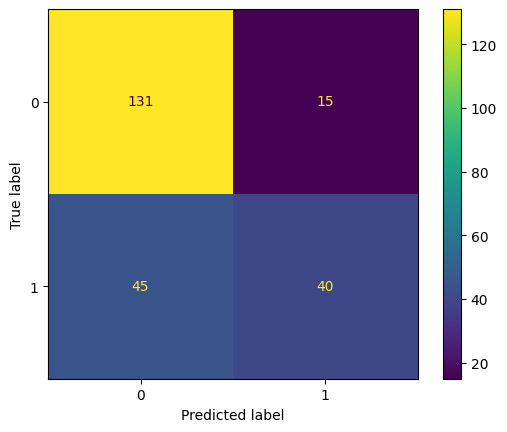

In [4]:
# Import the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion matrix
#plot_confusion_matrix(model , feature_test, target_test, values_format='d')
ConfusionMatrixDisplay.from_estimator(model, feature_test, target_test)

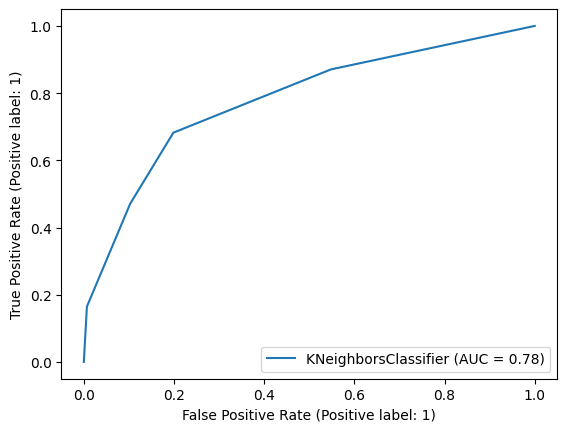

In [5]:
predictions_prob = model.predict_proba(feature_test)[::,1]

# import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

# plot_roc_curve(model , feature_test, target_test)
RocCurveDisplay.from_estimator(model, feature_test, target_test)

In [6]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.7803384367445608


Q1. Based on the above confusion matrix, calculate by using the correct equation: Accuracy, Precision, Recall, F1-score. Explain the meaning of the numbers you get. 

Accuracy: This is the ratio of the total number of correct predictions to the total number of predictions. In this case, the accuracy is 0.7402597402597403, which means that about 74.03% of the total predictions made by the model are correct.

Precision: This is the ratio of true positive predictions to the total predicted positives. The precision score of 0.7272727272727273 indicates that when the model predicts that a patient has diabetes, it is correct about 72.73% of the time.

Recall (Sensitivity): This is the ratio of true positive predictions to the total actual positives. The recall score of 0.47058823529411764 indicates that the model correctly identifies about 47.06% of all actual diabetes cases.

F1-Score: This is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall. The F1-score of 0.5714285714285714 suggests that the model’s precision and recall are balanced at approximately 57.14%.

Area Under Curve (AUC): This is the area under the Receiver Operating Characteristic (ROC) curve. The AUC of 0.7803384367445608 suggests that the model has about a 78.03% chance of correctly distinguishing between positive and negative classes.

Q2. Keep modifying the number of neighbours (K) to  7, 17, 15, 21, 25, 33, can you get a higher accuracy, F1-Score? Can you get a better AUC?

In [7]:
def knn(n):
  # Create a KNN classifier object
  model = KNeighborsClassifier(n_neighbors=n)
  
  # Train the model using the training dataset
  model.fit(feature_train,target_train)
  
  # Predict the target variable for test dataset
  predictions = model.predict(feature_test)

  # Calculate model accuracy
  print("Accuracy:",accuracy_score(target_test, predictions))
  # Calculate model f1 score
  print("F1-Score:",f1_score(target_test, predictions))

  # Compute the area under ROC curve
  auc = roc_auc_score(target_test, predictions_prob)

  # Print auc value
  print("Area Under Curve:",auc)
  
print(f"n_neighbors=4------------------------")
knn(4)
print(f"n_neighbors=7------------------------")
knn(7)
print(f"n_neighbors=15-----------------------")
knn(15)
print(f"n_neighbors=17-----------------------")
knn(17)
print(f"n_neighbors=21-----------------------")
knn(21)
print(f"n_neighbors=25-----------------------")
knn(25)
print(f"n_neighbors=33-----------------------")
knn(33)

n_neighbors=4------------------------
Accuracy: 0.7402597402597403
F1-Score: 0.5714285714285714
Area Under Curve: 0.7803384367445608
n_neighbors=7------------------------
Accuracy: 0.7705627705627706
F1-Score: 0.6580645161290323
Area Under Curve: 0.7803384367445608
n_neighbors=15-----------------------
Accuracy: 0.7922077922077922
F1-Score: 0.6756756756756757
Area Under Curve: 0.7803384367445608
n_neighbors=17-----------------------
Accuracy: 0.7835497835497836
F1-Score: 0.6575342465753424
Area Under Curve: 0.7803384367445608
n_neighbors=21-----------------------
Accuracy: 0.8008658008658008
F1-Score: 0.6805555555555555
Area Under Curve: 0.7803384367445608
n_neighbors=25-----------------------
Accuracy: 0.7748917748917749
F1-Score: 0.6176470588235294
Area Under Curve: 0.7803384367445608
n_neighbors=33-----------------------
Accuracy: 0.8138528138528138
F1-Score: 0.6950354609929078
Area Under Curve: 0.7803384367445608


Conclusion: Modifying the number of neighbors (K) in a K-Nearest Neighbors (KNN) model does not increase the model’s performance. The optimal value of K (i.e., the one that results in the best model performance) is highly dependent on the specific dataset and problem at hand. It’s also worth noting that increasing K doesn’t always lead to better performance. While a larger K can help reduce the impact of noise in the data, it can also make the decision boundary less distinct and potentially lead to worse performance for some instances.

Q3. Compare your results to the accuracy and AUC of Logistic Regression Model.

In [8]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)
# print(abs(predictions - target_test))

 
# Assess model performance using accuracy measure
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(target_test, predictions)
# print (cnf_matrix)


print(f"----Logistic Regression Model--------")

print("Accuracy:",metrics.accuracy_score(target_test, predictions))

print ("F1: ", metrics.f1_score(target_test, predictions, average='binary'))

# Calculate model AUC
logistic_predictions_prob = logreg.predict_proba(feature_test)[:,1]
print("Area Under Curve:", roc_auc_score(target_test, logistic_predictions_prob))

print(f"----KNN Model------------------------")
knn(4)

----Logistic Regression Model--------
Accuracy: 0.7835497835497836
F1:  0.6621621621621621
Area Under Curve: 0.8628525382755843
----KNN Model------------------------
Accuracy: 0.7402597402597403
F1-Score: 0.5714285714285714
Area Under Curve: 0.7803384367445608


Conclusion: The Logistic Regression model appears to perform better than the K-Nearest Neighbors (KNN) model with 4 neighbors on this dataset.

Accuracy: The Logistic Regression model has an accuracy of 0.7835497835497836, which is higher than the KNN model’s accuracy of 0.7402597402597403. This means that the Logistic Regression model made a higher percentage of correct predictions.

F1-Score: The F1-Score for the Logistic Regression model is 0.6621621621621621, which is also higher than the KNN model’s F1-Score of 0.5714285714285714. The F1-Score is a measure of a test’s accuracy that considers both the precision and the recall. A higher F1-Score suggests that both the precision and recall of the Logistic Regression model are higher.

Area Under Curve (AUC): The AUC for the Logistic Regression model is 0.8628525382755843, which is higher than the KNN model’s AUC of 0.7803384367445608. The AUC is a performance measurement for the classification problems at various threshold settings and a higher AUC indicates that the model is better at predicting 0s as 0s and 1s as 1s.

Q4. Write down all of your comparisons/tables/charts and answers in a document/pdf file. 